In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE =32
CHANNELS =3
EPOCHS=5

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("dataset", shuffle=True,
image_size = (IMAGE_SIZE,IMAGE_SIZE),
batch_size = BATCH_SIZE
)


Found 4501 files belonging to 3 classes.


In [5]:
len(dataset) #this is the no. of batches and each batch has 32 images. means 4501 images are divided in 141 batches and each batch has 32 images from the dataset at random

141

In [6]:
class_names = dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [7]:
num_of_images = 0

for image_batch,label_batch in dataset.take(1):
    num_of_images = image_batch
    print(image_batch.shape)
    print(label_batch)
print(len(num_of_images))

(32, 256, 256, 3)
tf.Tensor([1 1 2 1 1 1 1 2 2 2 1 0 1 2 2 0 2 0 1 2 2 1 1 1 2 2 1 2 2 1 2 1], shape=(32,), dtype=int32)
32


In [8]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)
    print(image_batch[0])

(256, 256, 3)
tf.Tensor(
[[[153. 144. 149.]
  [151. 142. 147.]
  [146. 137. 142.]
  ...
  [120. 109. 113.]
  [136. 125. 129.]
  [113. 102. 106.]]

 [[143. 134. 139.]
  [147. 138. 143.]
  [149. 140. 145.]
  ...
  [114. 103. 107.]
  [129. 118. 122.]
  [106.  95.  99.]]

 [[130. 121. 126.]
  [138. 129. 134.]
  [144. 135. 140.]
  ...
  [109.  98. 102.]
  [135. 124. 128.]
  [118. 107. 111.]]

 ...

 [[162. 153. 156.]
  [142. 133. 136.]
  [164. 155. 158.]
  ...
  [118. 107. 105.]
  [137. 126. 124.]
  [123. 112. 110.]]

 [[166. 157. 160.]
  [155. 146. 149.]
  [155. 146. 149.]
  ...
  [148. 137. 135.]
  [130. 119. 117.]
  [127. 116. 114.]]

 [[136. 127. 130.]
  [149. 140. 143.]
  [143. 134. 137.]
  ...
  [143. 132. 130.]
  [155. 144. 142.]
  [118. 107. 105.]]], shape=(256, 256, 3), dtype=float32)


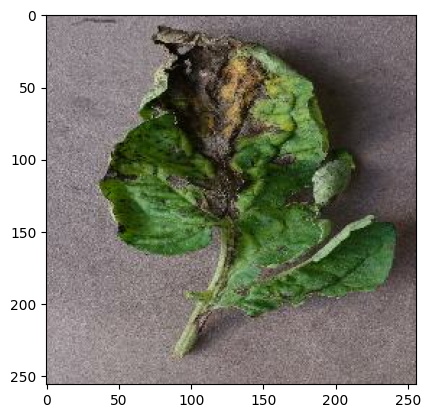

In [9]:
plt.imshow(image_batch[0].numpy().astype("uint8"))

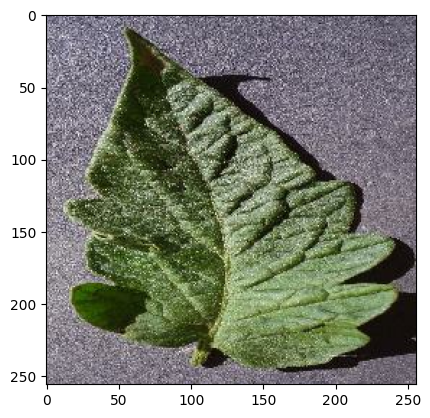

In [10]:
plt.imshow(image_batch[5].numpy().astype("uint8"))

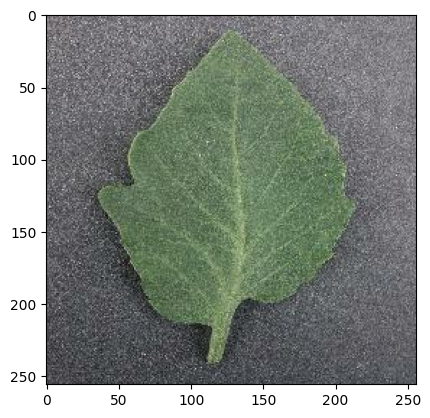

In [11]:
plt.imshow(image_batch[25].numpy().astype("uint8"))

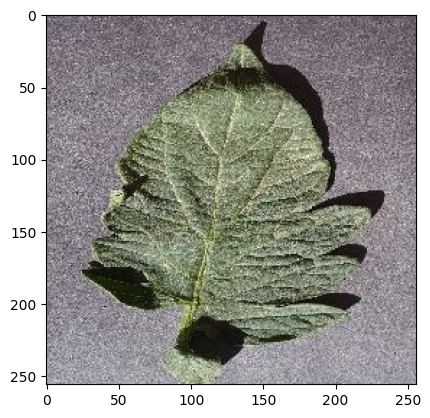

In [12]:
plt.imshow(image_batch[1].numpy().astype("uint8"))

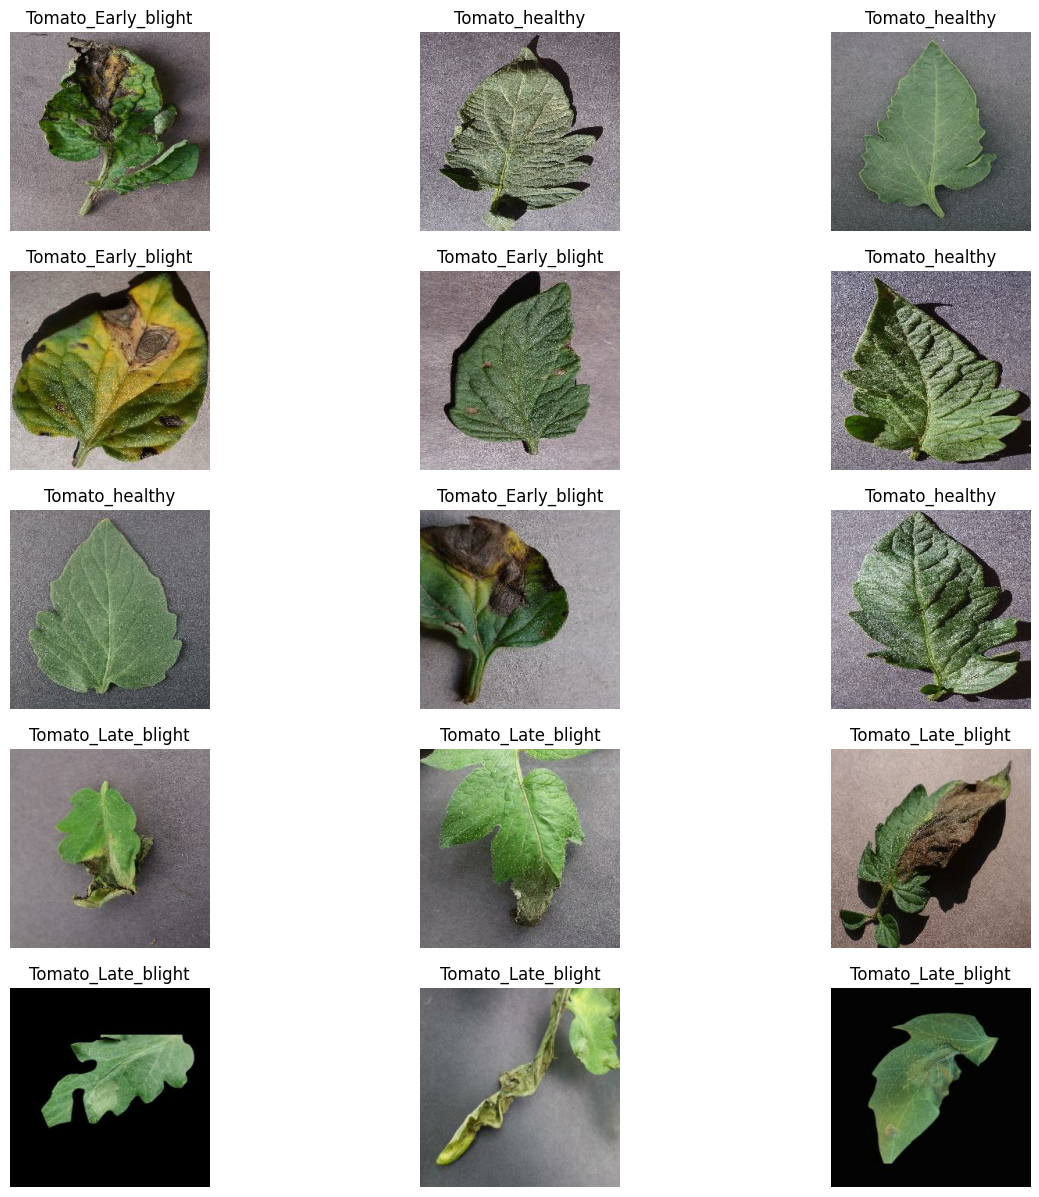

In [13]:
plt.figure(figsize = (15,15))
for i in range(0,15):
    ax=plt.subplot(5,3,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [14]:
train_size = 0.8
total_training_images = np.round(len(dataset)*train_size)
total_training_images

np.float64(113.0)

In [15]:
train_ds = dataset.take(total_training_images)
len(train_ds)

113

In [16]:
total_val_test_images = dataset.skip(total_training_images)
len(total_val_test_images)

28

In [17]:
val_size = 0.1
total_vali_images = np.round(len(dataset)*val_size)
total_vali_images

np.float64(14.0)

In [18]:
val_ds = total_val_test_images.take(total_vali_images)
len(val_ds)

14

In [19]:
test_size = 0.1
total_test_images = np.round(len(dataset)*test_size)
total_test_images

np.float64(14.0)

In [20]:
test_ds = total_val_test_images.skip(total_vali_images)
len(test_ds)

14

In [21]:
def get_dataset_partitons_tf(ds, train_split = 0.8, val_split = 0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    ds_size = (len(ds))

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

        train_size = np.round(train_split*ds_size)
        train_ds = ds.take(train_size)
        
        val_size = np.round(val_split*ds_size)
        val_ds = ds.skip(train_size).take(val_size)
        test_ds = ds.skip(train_size).skip(val_size)

        return train_ds,val_ds,test_ds

In [22]:
train_ds,val_ds,test_ds = get_dataset_partitons_tf(dataset)

In [23]:
len(train_ds)


113

In [24]:
len(val_ds)


14

In [25]:
len(test_ds)

14

In [26]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [28]:
data_augmentation = tf.keras.Sequential ([
    layers.RandomFlip("horizontal_and_vartical"),
    layers.RandomRotation(0.2)
    ])

In [29]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size= (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape = input_shape)

c:\Users\91931\anaconda3\envs\tf\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'] 
)

In [32]:
history = model.fit(
    train_ds, 
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1,
    epochs = EPOCHS
)

Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 113s 899ms/step - accuracy: 0.5128 - loss: 0.9228 - val_accuracy: 0.8214 - val_loss: 0.4640
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 107s 946ms/step - accuracy: 0.8047 - loss: 0.4519 - val_accuracy: 0.8527 - val_loss: 0.3406
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 90s 798ms/step - accuracy: 0.8648 - loss: 0.3325 - val_accuracy: 0.8348 - val_loss: 0.3774
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 85s 755ms/step - accuracy: 0.8382 - loss: 0.3661 - val_accuracy: 0.8795 - val_loss: 0.2700
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 84s 741ms/step - accuracy: 0.8927 - loss: 0.2676 - val_accuracy: 0.8571 - val_loss: 0.3221


In [33]:
scores = model.evaluate(test_ds)
scores

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 369ms/step - accuracy: 0.8956 - loss: 0.2880


[0.29935789108276367, 0.8861607313156128]

first image to predict
actual label: Tomato_healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step
predicted label: Tomato_healthy


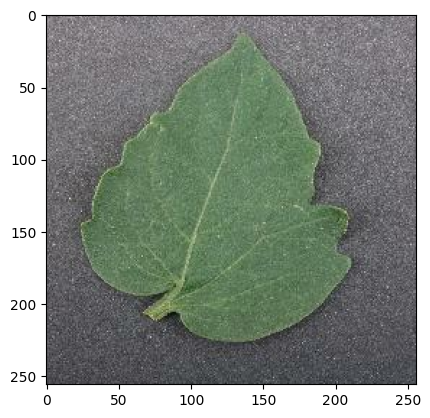

In [34]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1): ##looping first batch i.e. 32 images
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [35]:
def predict(model, image):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


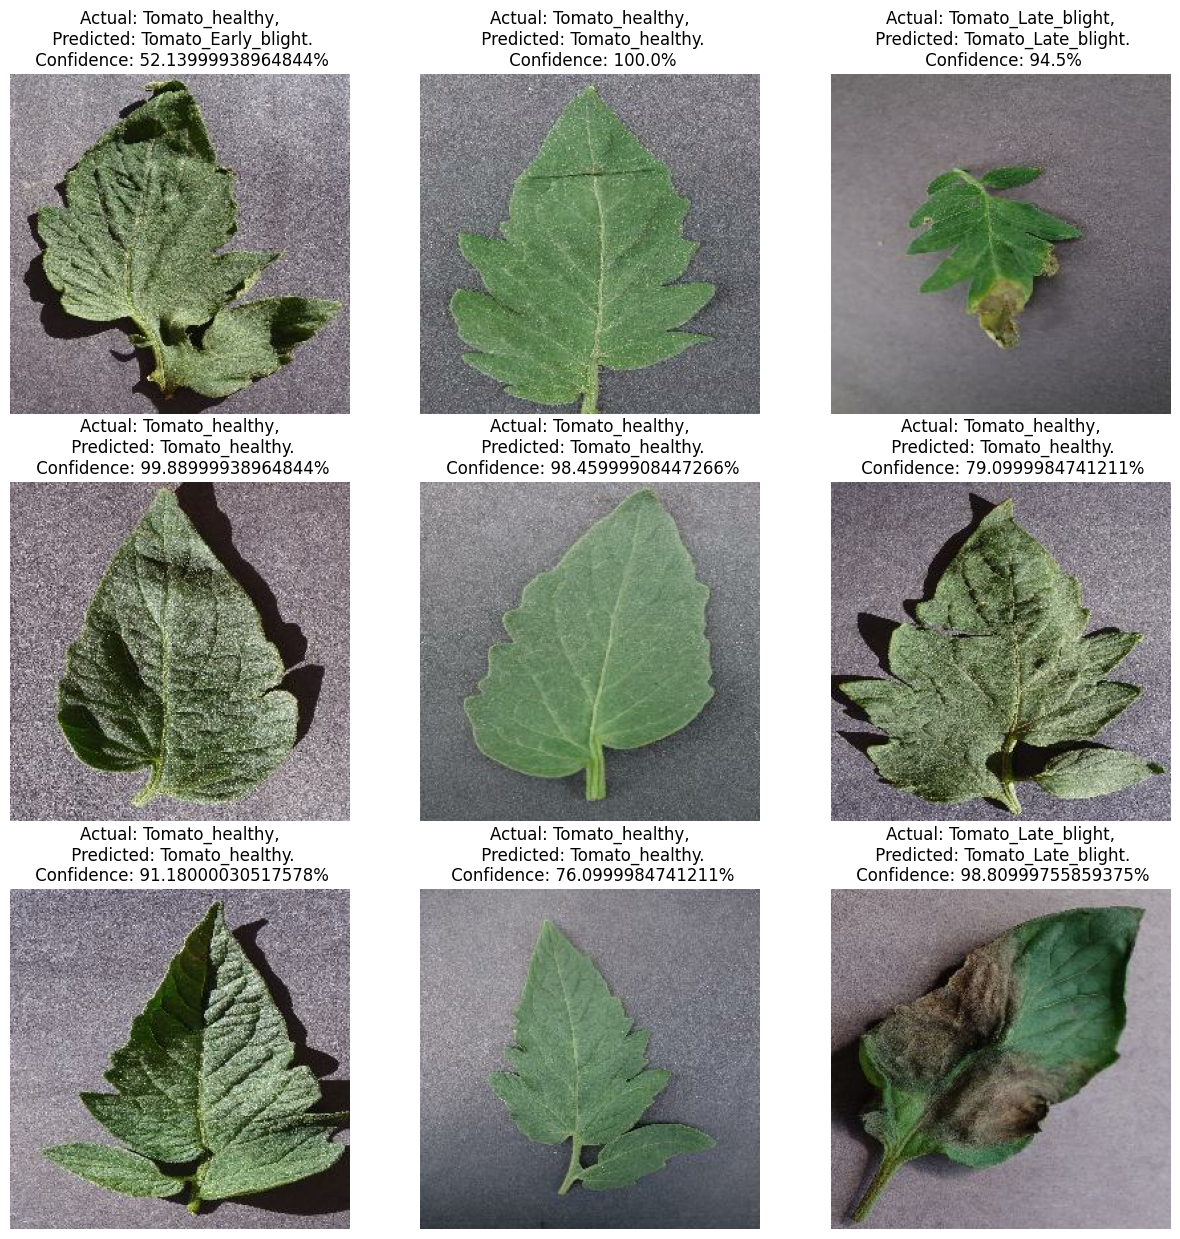

In [36]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9): ##doing prediction on 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [38]:
model_version = 2
model.save(f"../api_model/{model_version}.keras")

In [39]:
import os
model_dir = "../api_model"
existing_model = os.listdir(model_dir)
existing_model
model_version = [int(e.split(".")[0]) for e in os.listdir(model_dir) if e.endswith(".keras")]
model_version
new_version = max(model_version) + 1 
new_version
model.save(f"{model_dir}/{new_version}.keras")

In [40]:
# import os
# model_version=max([int(i) for i in os.listdir("../mymodels") + [0]])+1
# model.save(f"../mymodels/{model_version}")

In [42]:
import os
import tensorflow as tf

model_version = max([int(i) for i in os.listdir("../mymodels") if i.isdigit()] + [0]) + 1
export_path = f"../mymodels/{model_version}"

model.export(export_path)
print(f"Model exported to: {export_path}")

INFO:tensorflow:Assets written to: ../mymodels/1\assets


INFO:tensorflow:Assets written to: ../mymodels/1\assets


Saved artifact at '../mymodels/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1215751592592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1215751654384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1215751684512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1215751684336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1215751686448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1215751686272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1215751688032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1215751704816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1215751706752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1215751706576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1215751708512: TensorSpec(shape=(), d